In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from matplotlib import rcParams
rcParams['font.fantasy'] = 'Arial', 'Times New Roman', 'Tahoma', 'Comic Sans MS', 'Courier', 'Shadow'
rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Times New Roman'
#plt.style.use('seaborn')

In [7]:
def f(x, t): return m.cos(x)*(m.cos(t)+m.sin(t))
x0 = 0
xl = m.pi/2
t0 = 0
tl = 0.01

In [12]:
def explicit(x0,xl,t0,tl,f,N, M):
    h = (xl-x0)/N
    tau = (tl-t0)/M
    x = np.linspace(x0,xl,N)
    t = np.linspace(t0,tl,M)
    if tau > h**2/2:
        print('tau > h**2/2!!!')
        print('h =',h,'\ntau =',tau)
    u = np.zeros((M,N), dtype = 'float64')
    for k in range(M):
        for j in range(N):
            if k == 0:
                u[k][j] = 0
            else:
                if j == 0:
                    u[k][j] = m.sin(j*tau)
                elif j == N-1:
                    u[k][j] = u[k][j - 1]- h*m.sin(k*tau)
                else:
                    u[k][j] = u[k-1][j]+(tau/h**2)*(u[k-1][j+1] - 2*u[k-1][j] + u[k-1][j-1]) + f(k*h,j*tau)
    return {'u':u, 'x':x, 't': t}

In [13]:
data = explicit(x0,xl,t0,tl,f,50,600)

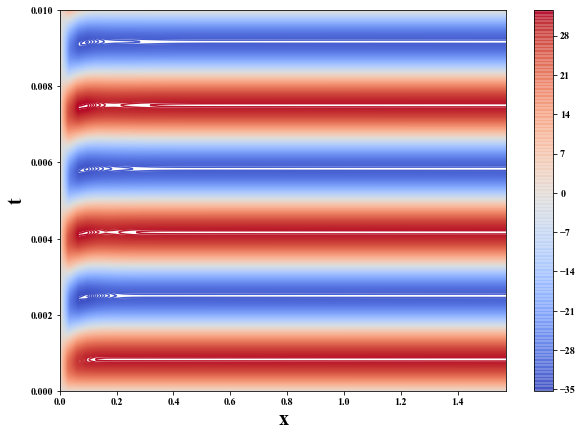

In [14]:
%matplotlib inline
from matplotlib import cm
x_arr,t_arr = np.meshgrid(data['x'],data['t'])
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111)
x_arr,t_arr = np.meshgrid(data['x'],data['t'])
cont = ax.contour(x_arr,t_arr, data['u'], 300, cmap=cm.coolwarm)
fig.colorbar(cont)
#ax.set_title('Проекция u(x,t) на плоскость Oxt\n', size = 20)
ax.set_xlabel('x', size = 20)
ax.set_ylabel('t',size = 20)
plt.show()

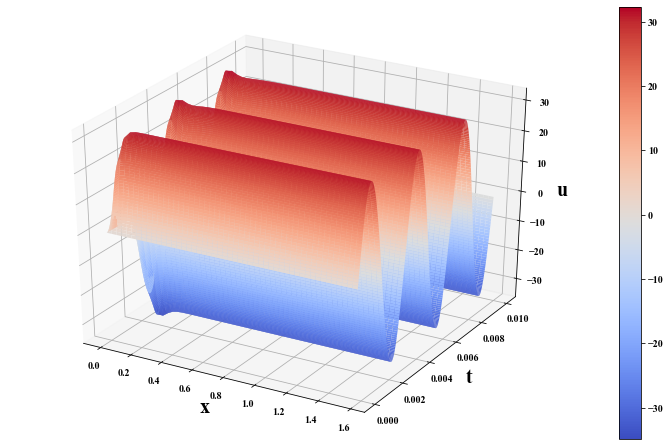

In [15]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,6))
ax = Axes3D(fig)
surf = ax.plot_surface(x_arr, t_arr, data['u'], cmap=cm.coolwarm, rstride=1, cstride=1)
#ax.set_title('График поверхности u(x,t) \n', size = 25)
ax.set_xlabel('x', size = 20)
ax.set_ylabel('t', size = 20)
ax.set_zlabel('u', size = 20)
fig.colorbar(surf)
plt.show()

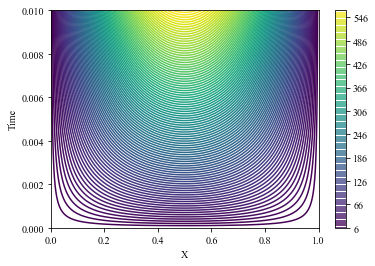

In [59]:
plt.figure()
plt.contour(x_arr, t_arr, data['u'], 100)
plt.colorbar() 
plt.xlabel('X')
plt.ylabel('Time')
#plt.savefig('wave_contour.png', Transparent=True)
plt.show()